In [1]:
!python -m pip install --user --upgrade pip

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for classification
from sklearn import metrics

In [3]:
!pip install haversine

In [4]:
from haversine import haversine

In [5]:
# Classification Data (Using Direct Location)
location = r'.\coffee_ANSI.csv'
df = pd.read_csv(location, encoding = 'ANSI')
df

,시군구명,경도,위도
0,종로구,127.00,37.58
1,도봉구,127.03,37.66
2,마포구,126.93,37.55
3,양천구,126.84,37.52
4,송파구,127.12,37.49
...,...,...,...
20479,종로구,127.00,37.58
20480,마포구,126.94,37.55
20481,종로구,127.01,37.57
20482,강남구,127.05,37.49


In [6]:
df

,시군구명,경도,위도
0,종로구,127.00,37.58
1,도봉구,127.03,37.66
2,마포구,126.93,37.55
3,양천구,126.84,37.52
4,송파구,127.12,37.49
...,...,...,...
20479,종로구,127.00,37.58
20480,마포구,126.94,37.55
20481,종로구,127.01,37.57
20482,강남구,127.05,37.49


In [7]:
#isgu =  df['시군구명'] == '종로구'
#df1 = df[isgu]

In [8]:
df1 = df['시군구명'].unique()

In [9]:
df1

array(['종로구', '도봉구', '마포구', '양천구', '송파구', '광진구', '관악구', '강동구', '강서구',
       '강남구', '노원구', '용산구', '영등포구', '서초구', '금천구', '성동구', '성북구', '구로구',
       '서대문구', '은평구', '중구', '동작구', '중랑구', '강북구', '동대문구'], dtype=object)

In [10]:
dfs = []
for i in df1:    
    isgu =  df['시군구명'] == i
    df2 = df[isgu]
    dfs.append(df2)

In [11]:
df_종로구 = dfs[0]

In [12]:
df_종로구

,시군구명,경도,위도
0,종로구,127.00,37.58
7,종로구,126.98,37.58
15,종로구,127.01,37.58
32,종로구,127.01,37.58
49,종로구,127.00,37.58
...,...,...,...
20468,종로구,126.99,37.58
20473,종로구,127.00,37.58
20478,종로구,126.97,37.57
20479,종로구,127.00,37.58


In [40]:
X=np.array(df_종로구[['경도', '위도']])

In [41]:
haversine(X[0] , X[1], unit = 'km')

2.0315870390288313

In [42]:
df_종로구['경도'].mean()

126.9847323371672

In [43]:
Y = (df_종로구['경도'].mean(),df_종로구['위도'].mean())

In [44]:
Y

(126.9847323371672, 37.579591341977206)

In [45]:
rd = 0
for i in range(len(df_종로구)-1):
    length = haversine(Y,X[i],unit = 'km')
    rd = rd + length

In [56]:
print(rd)

709.2068479018141


In [75]:
rd_list = []
for i in range(0,25) :
    X=np.array(dfs[i][['경도', '위도']])
    Y = (dfs[i]['경도'].mean(),dfs[i]['위도'].mean())
    rd = 0
    for j in range(len(dfs[i])-1):
        length = haversine(Y,X[j],unit = 'km')
        rd = rd + length
        rdm = rd/(len(dfs[i])-1)
    rd_list.append(rdm)

In [77]:
df_구 = df = pd.DataFrame(columns=['지역구명', 'RDM'])

In [82]:
for i in range(0, 25):
       df_구.loc[i] = [df1[i], rd_list[i]]

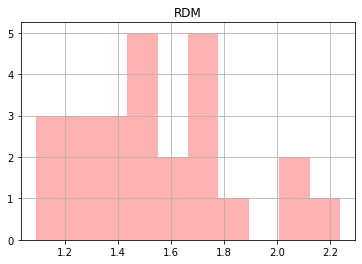

In [91]:
df_구[["RDM"]].hist(bins=10, alpha=.3, color='r')
plt.show()

In [84]:
df_구.to_csv('구별RDM.csv',encoding = 'ANSI')

In [93]:
location = r'.\coffee_ANSI.csv'
df = pd.read_csv(location, encoding = 'ANSI')
df

,시군구명,경도,위도
0,종로구,127.00,37.58
1,도봉구,127.03,37.66
2,마포구,126.93,37.55
3,양천구,126.84,37.52
4,송파구,127.12,37.49
...,...,...,...
20479,종로구,127.00,37.58
20480,마포구,126.94,37.55
20481,종로구,127.01,37.57
20482,강남구,127.05,37.49


In [103]:
df_count = df.groupby('시군구명').count()

In [108]:
df_count.to_csv('구별점포수.csv' , encoding = 'ANSI')

In [112]:
rd_list = []
for i in range(0,25) :
    X=np.array(dfs[i][['경도', '위도']])
    rd = 0
    for j in range(len(dfs[i])-1):
        for k in range(len(dfs[i])-1):            
            length = haversine(X[j],X[k],unit = 'km')
            rd = rd + length
    rd_list.append(rd)

In [118]:
rdm_list = []
for i in range(0,25):
    rdm = 0 
    rdm = rd_list[i]/(len(dfs[i]))
    rdm_list.append(rdm)

In [121]:
rdm_list[]

3176.26336006161

In [122]:
df_구 = df = pd.DataFrame(columns=['지역구명', 'RDM'])
for i in range(0, 25):
       df_구.loc[i] = [df1[i], rdm_list[i]]

In [124]:
df_구

,지역구명,RDM
0,종로구,"2,148.80"
1,도봉구,587.37
2,마포구,"3,176.26"
3,양천구,"1,168.12"
4,송파구,"2,723.23"
...,...,...
20,중구,"1,814.28"
21,동작구,"1,505.18"
22,중랑구,737.00
23,강북구,490.55


In [137]:
df_구.to_csv('구별RDM.csv', encoding = 'ANSI')

In [138]:
location = r'.\coffee_data.csv'
df_co = pd.read_csv(location, encoding = 'UTF-8')
df_co

,SIGUNGU_NM,RDM_no,점포수_,RDM
0,성동구,1.33,669,"1,235.62"
1,마포구,1.51,1432,"3,176.26"
2,양천구,1.58,548,"1,168.12"
3,송파구,1.85,1076,"2,723.23"
4,광진구,1.28,780,"1,340.16"
...,...,...,...,...
20,종로구,1.44,1052,"2,148.80"
21,구로구,2.24,624,"1,816.95"
22,동대문구,1.43,496,974.44
23,관악구,1.72,738,"1,712.01"


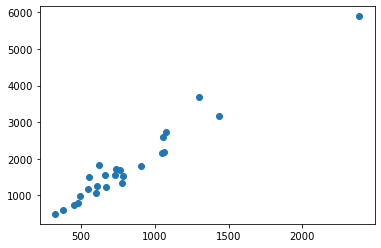

In [139]:
plt.scatter(df_co['점포수_'],df_co['RDM'])
plt.show()

In [140]:
df_co = df_co.drop(['RDM_no','SIGUNGU_NM'],axis = 1)

In [148]:
df_co

,점포수_,RDM
0,669,"1,235.62"
1,1432,"3,176.26"
2,548,"1,168.12"
3,1076,"2,723.23"
4,780,"1,340.16"
...,...,...
20,1052,"2,148.80"
21,624,"1,816.95"
22,496,974.44
23,738,"1,712.01"


In [150]:
scaler = preprocessing.RobustScaler()
scaler_fit = scaler.fit(df_co)
df_co_fes = pd.DataFrame(scaler_fit.transform(df_co), 
                           index=df_co.index, columns=df_co.columns)

In [151]:
df_co_fes
#.to_csv('co_scale.csv',encoding = 'ANSI')

,점포수_,RDM
0,-0.12,-0.33
1,1.40,1.65
2,-0.37,-0.40
3,0.69,1.19
4,0.10,-0.22
...,...,...
20,0.64,0.60
21,-0.21,0.26
22,-0.47,-0.60
23,0.01,0.15
